# <center> BODY PERFORMANCE CLASSFICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,auc,precision_score,confusion_matrix,accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
data=pd.read_csv('bodyPerformance.csv')
data.sample(10)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
8909  21.0      M      176.8      70.50        15.0       99.0     140.0   
6282  22.0      M      168.4      76.30        25.2       73.0     111.0   
3050  22.0      M      177.1      71.70        16.8       91.0     135.0   
2319  22.0      M      175.1      65.04         9.3       66.0     132.0   
9659  43.0      M      173.6      74.00        25.2       89.0     128.0   
981   33.0      F      166.2      57.40        23.7       72.0     117.0   
8884  22.0      F      163.3      48.70        23.9       81.0     115.0   
6852  21.0      F      168.2      55.70        22.0       65.0     115.0   
5768  57.0      F      157.3      52.50        28.8       87.0     142.0   
1283  39.0      M      174.2      77.10        18.3       93.0     146.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
8909       44.7                    19.85            68.0          238.0     B  
6282       35.6                    18.60            43.0          222.0     D  
3050       44.1                    13.30            50.0          245.0     B  
2319       45.2                    13.60            57.0          234.0     B  
9659       43.0                    -1.50            26.0          157.0     D  
981        28.9                    30.20            40.0          158.0     B  
8884       19.1                    -2.10            26.0          148.0     D  
6852       25.2                    26.30            41.0          190.0     A  
5768       21.6                    23.40            22.0          148.0     A  
1283       44.6                    11.20            33.0          218.0     C

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [4]:
data.shape

(13393, 12)

In [5]:
data.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

# <CENTER> UNIVARIATE ANALYSIS

## HISTOGRAM

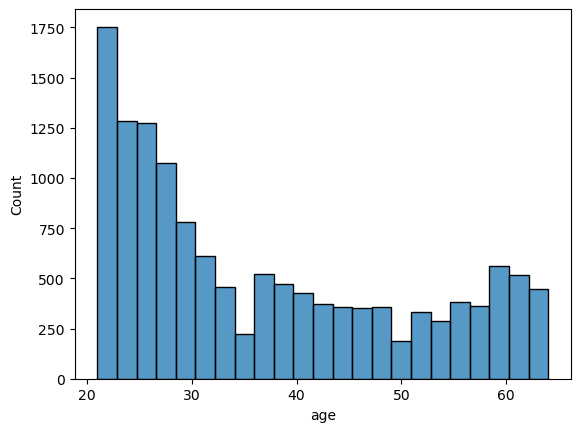

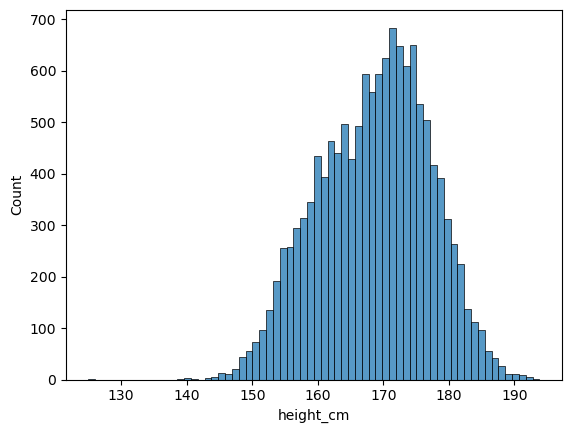

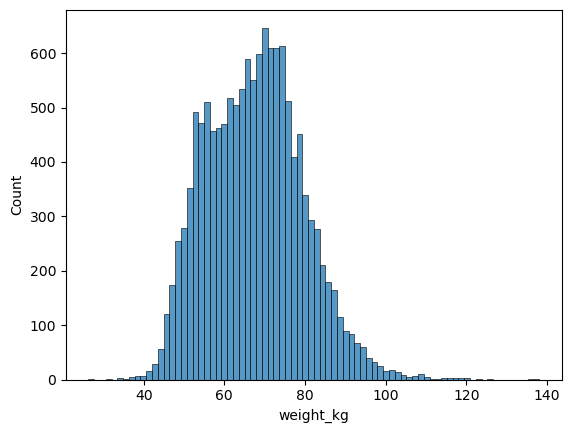

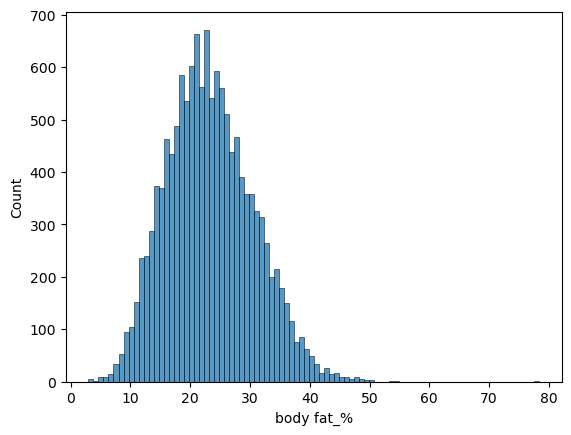

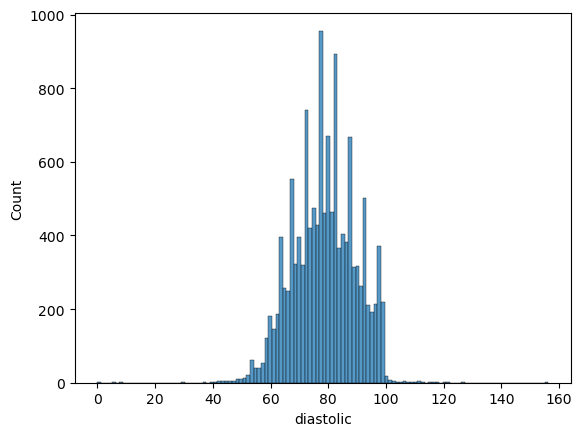

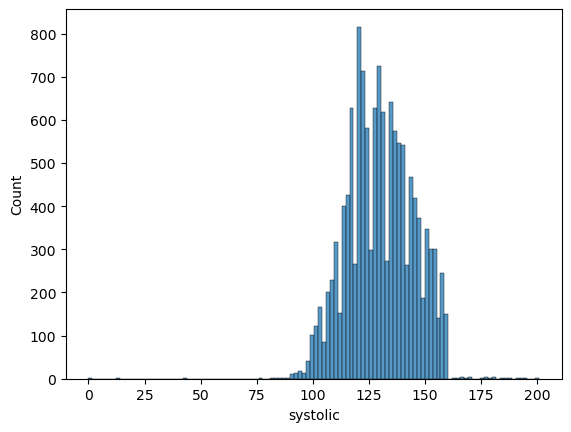

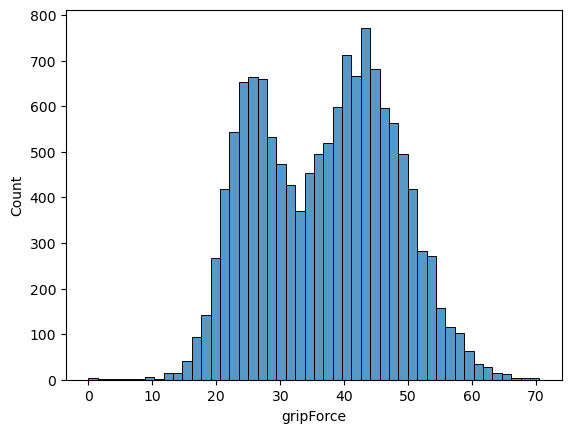

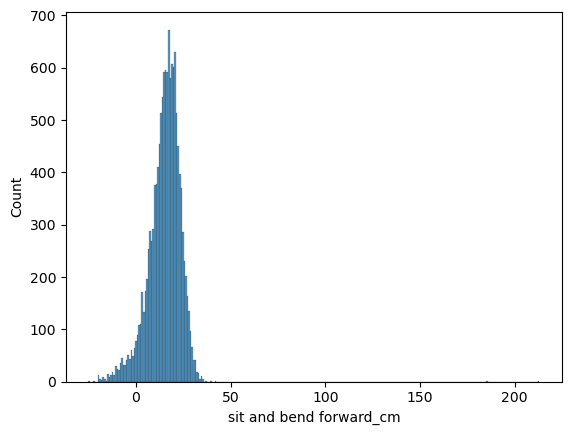

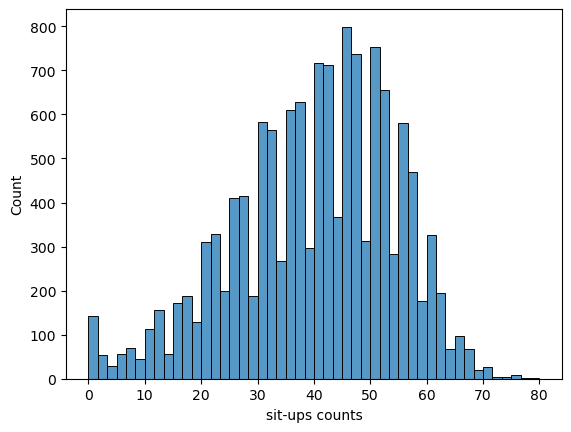

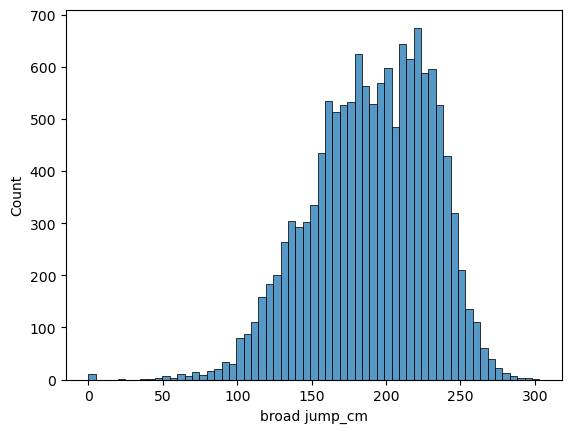

In [9]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.histplot(x=data[i])
        plt.show();

## KDE PLOT

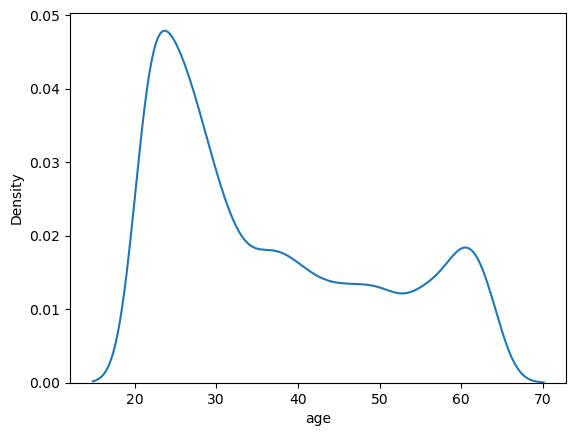

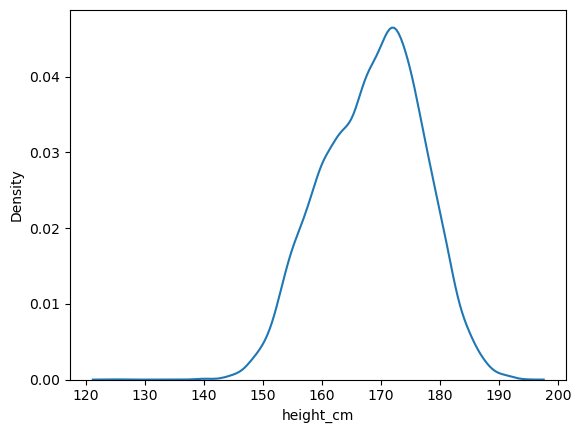

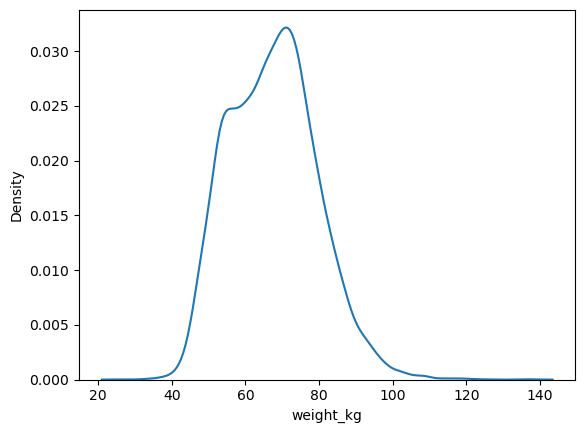

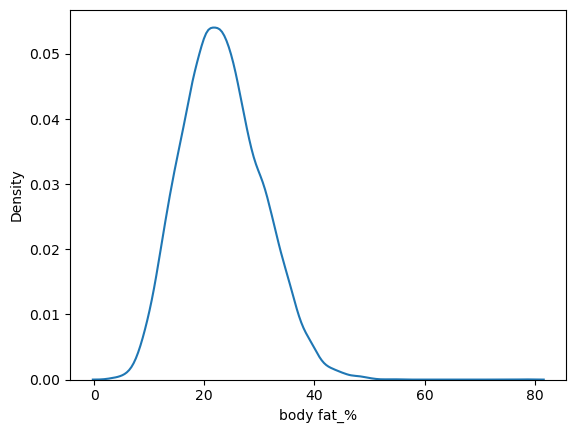

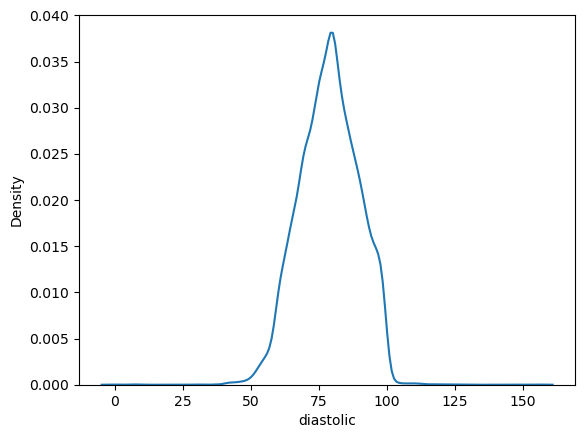

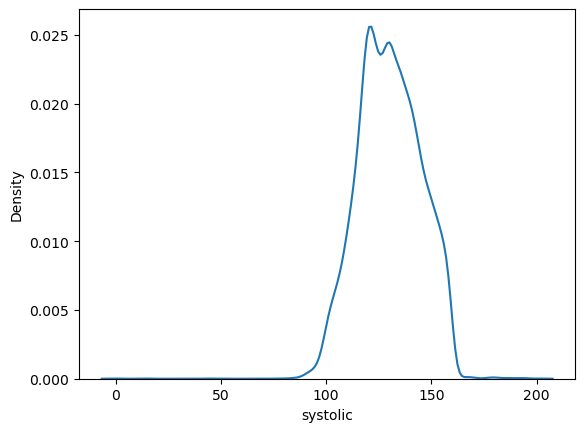

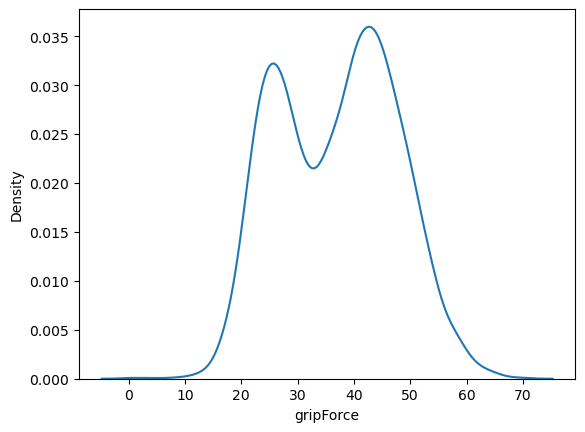

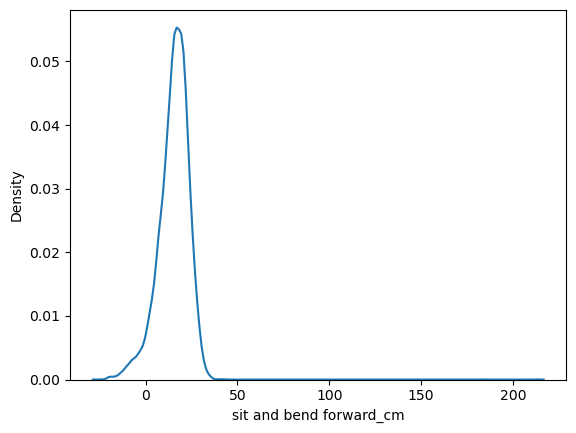

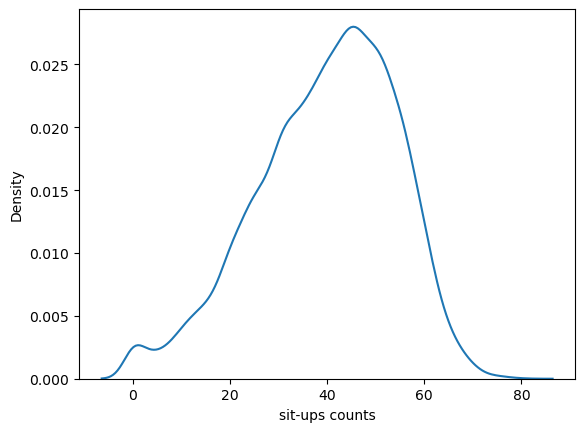

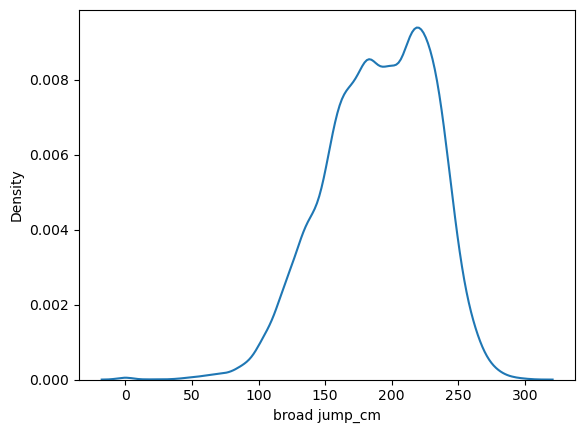

In [10]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i])
        plt.show();

## BOXPLOT

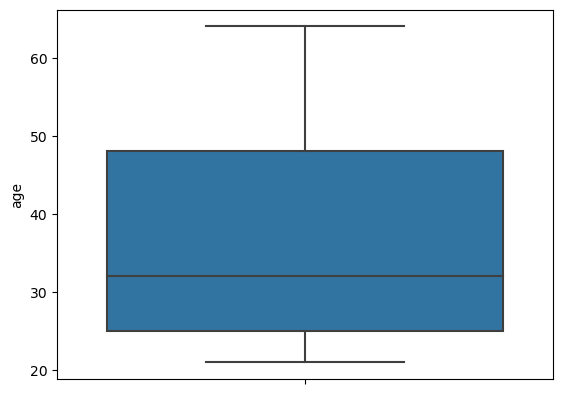

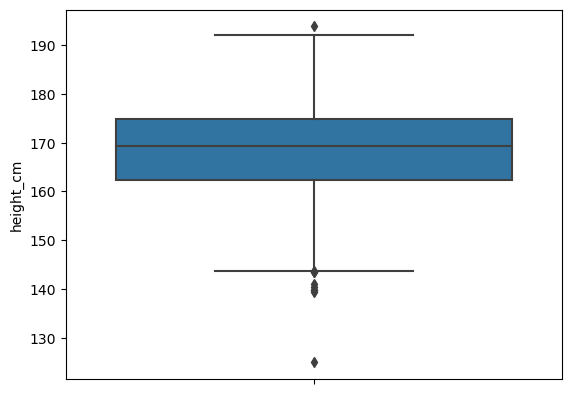

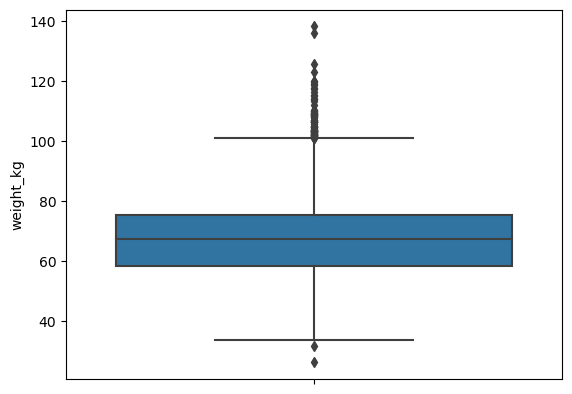

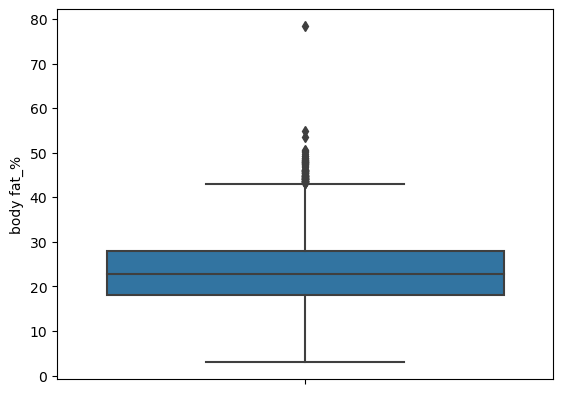

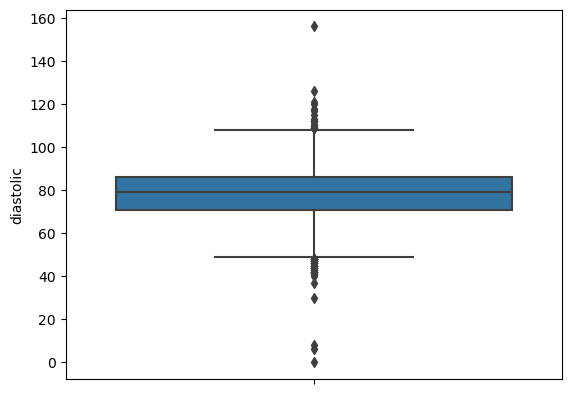

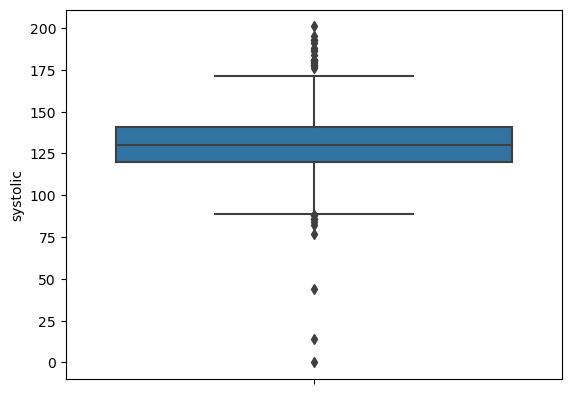

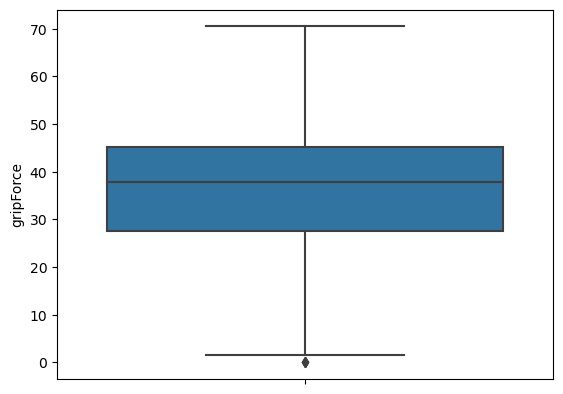

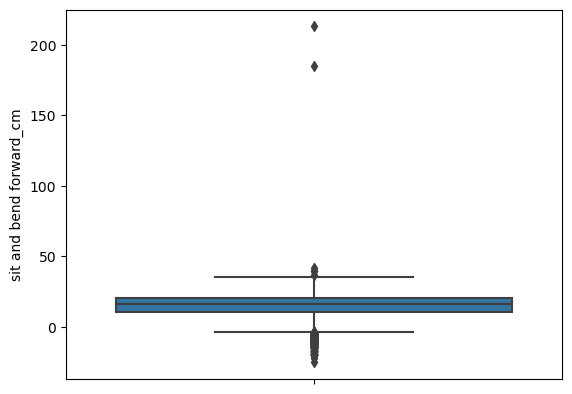

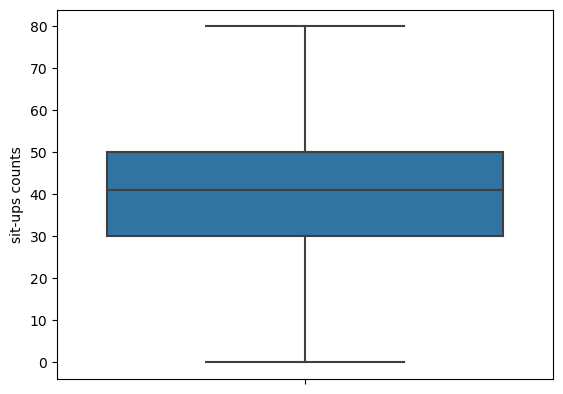

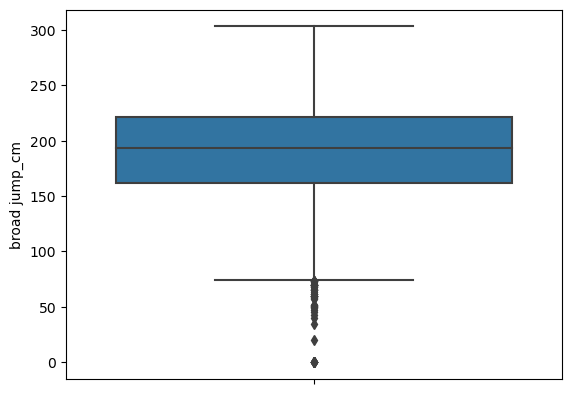

In [11]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show();

# <CENTER>MULTIVARIATE ANALYSIS

## BARPLOT

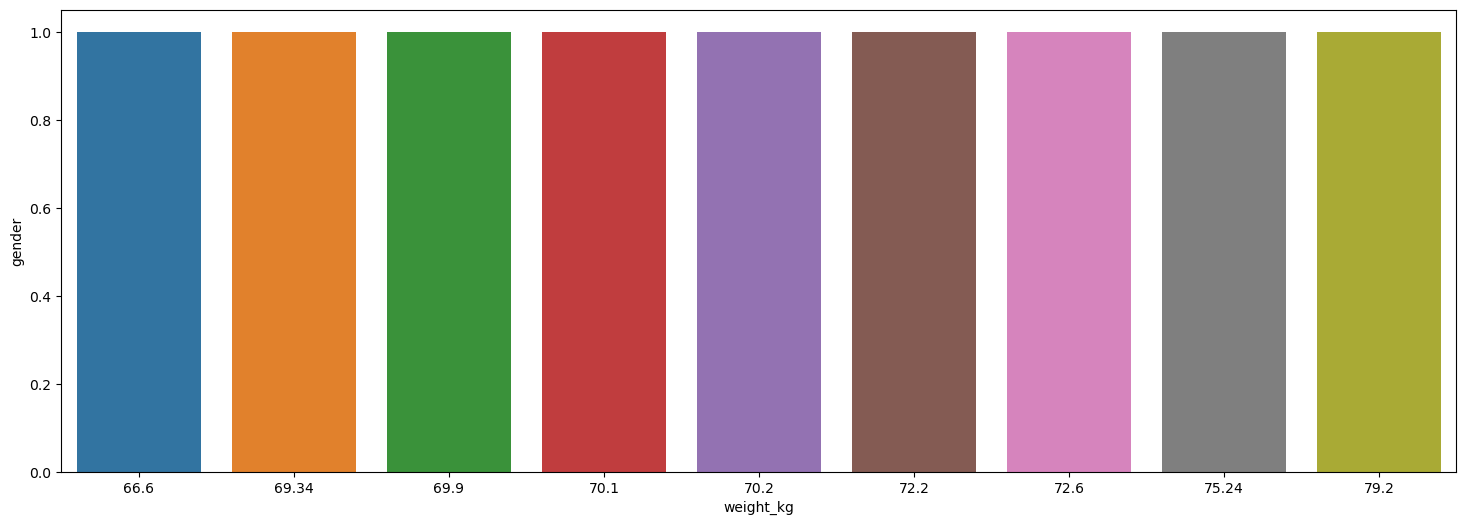

In [31]:
plt.figure(figsize=(18, 6))
sns.barplot(x='weight_kg', y='gender', data=data.sort_values(by='gender', ascending=False)[:10]);

<AxesSubplot:>

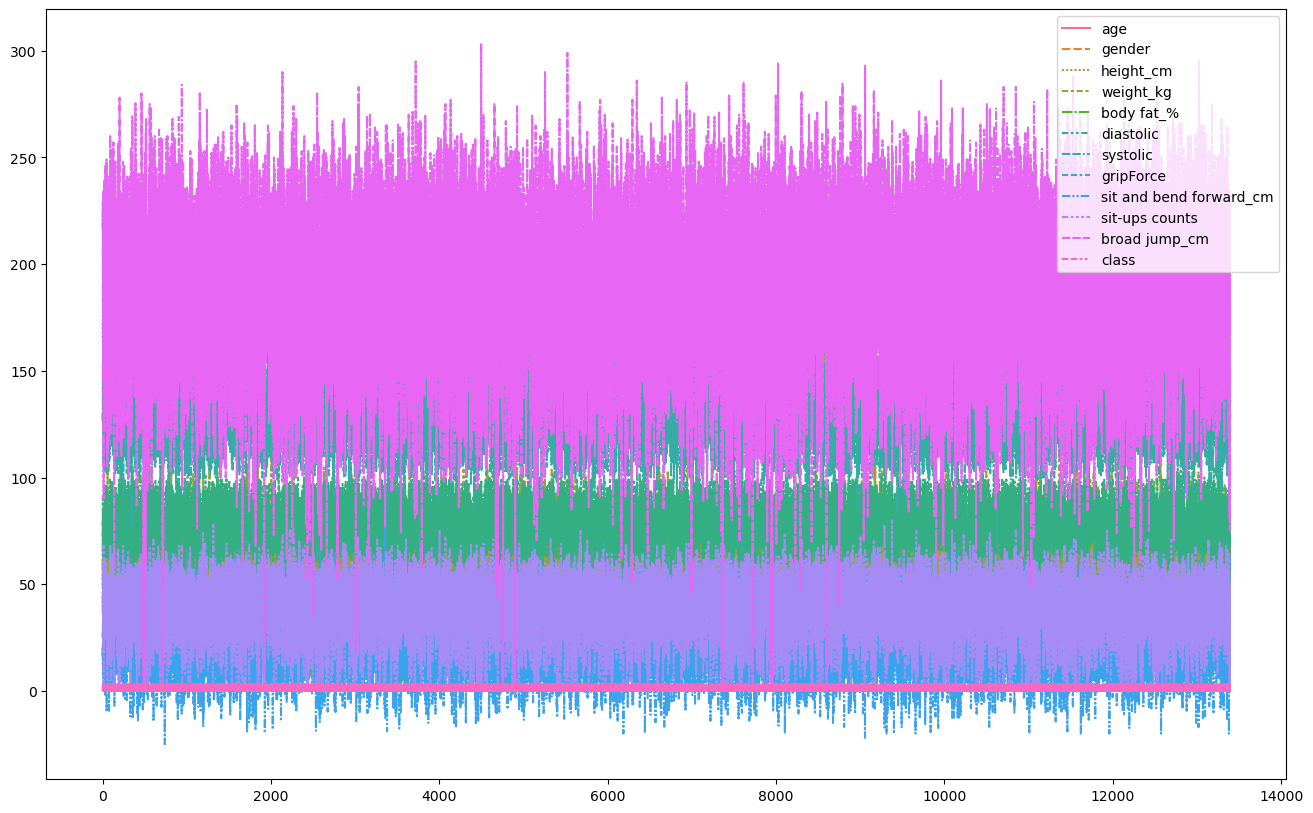

In [33]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data)

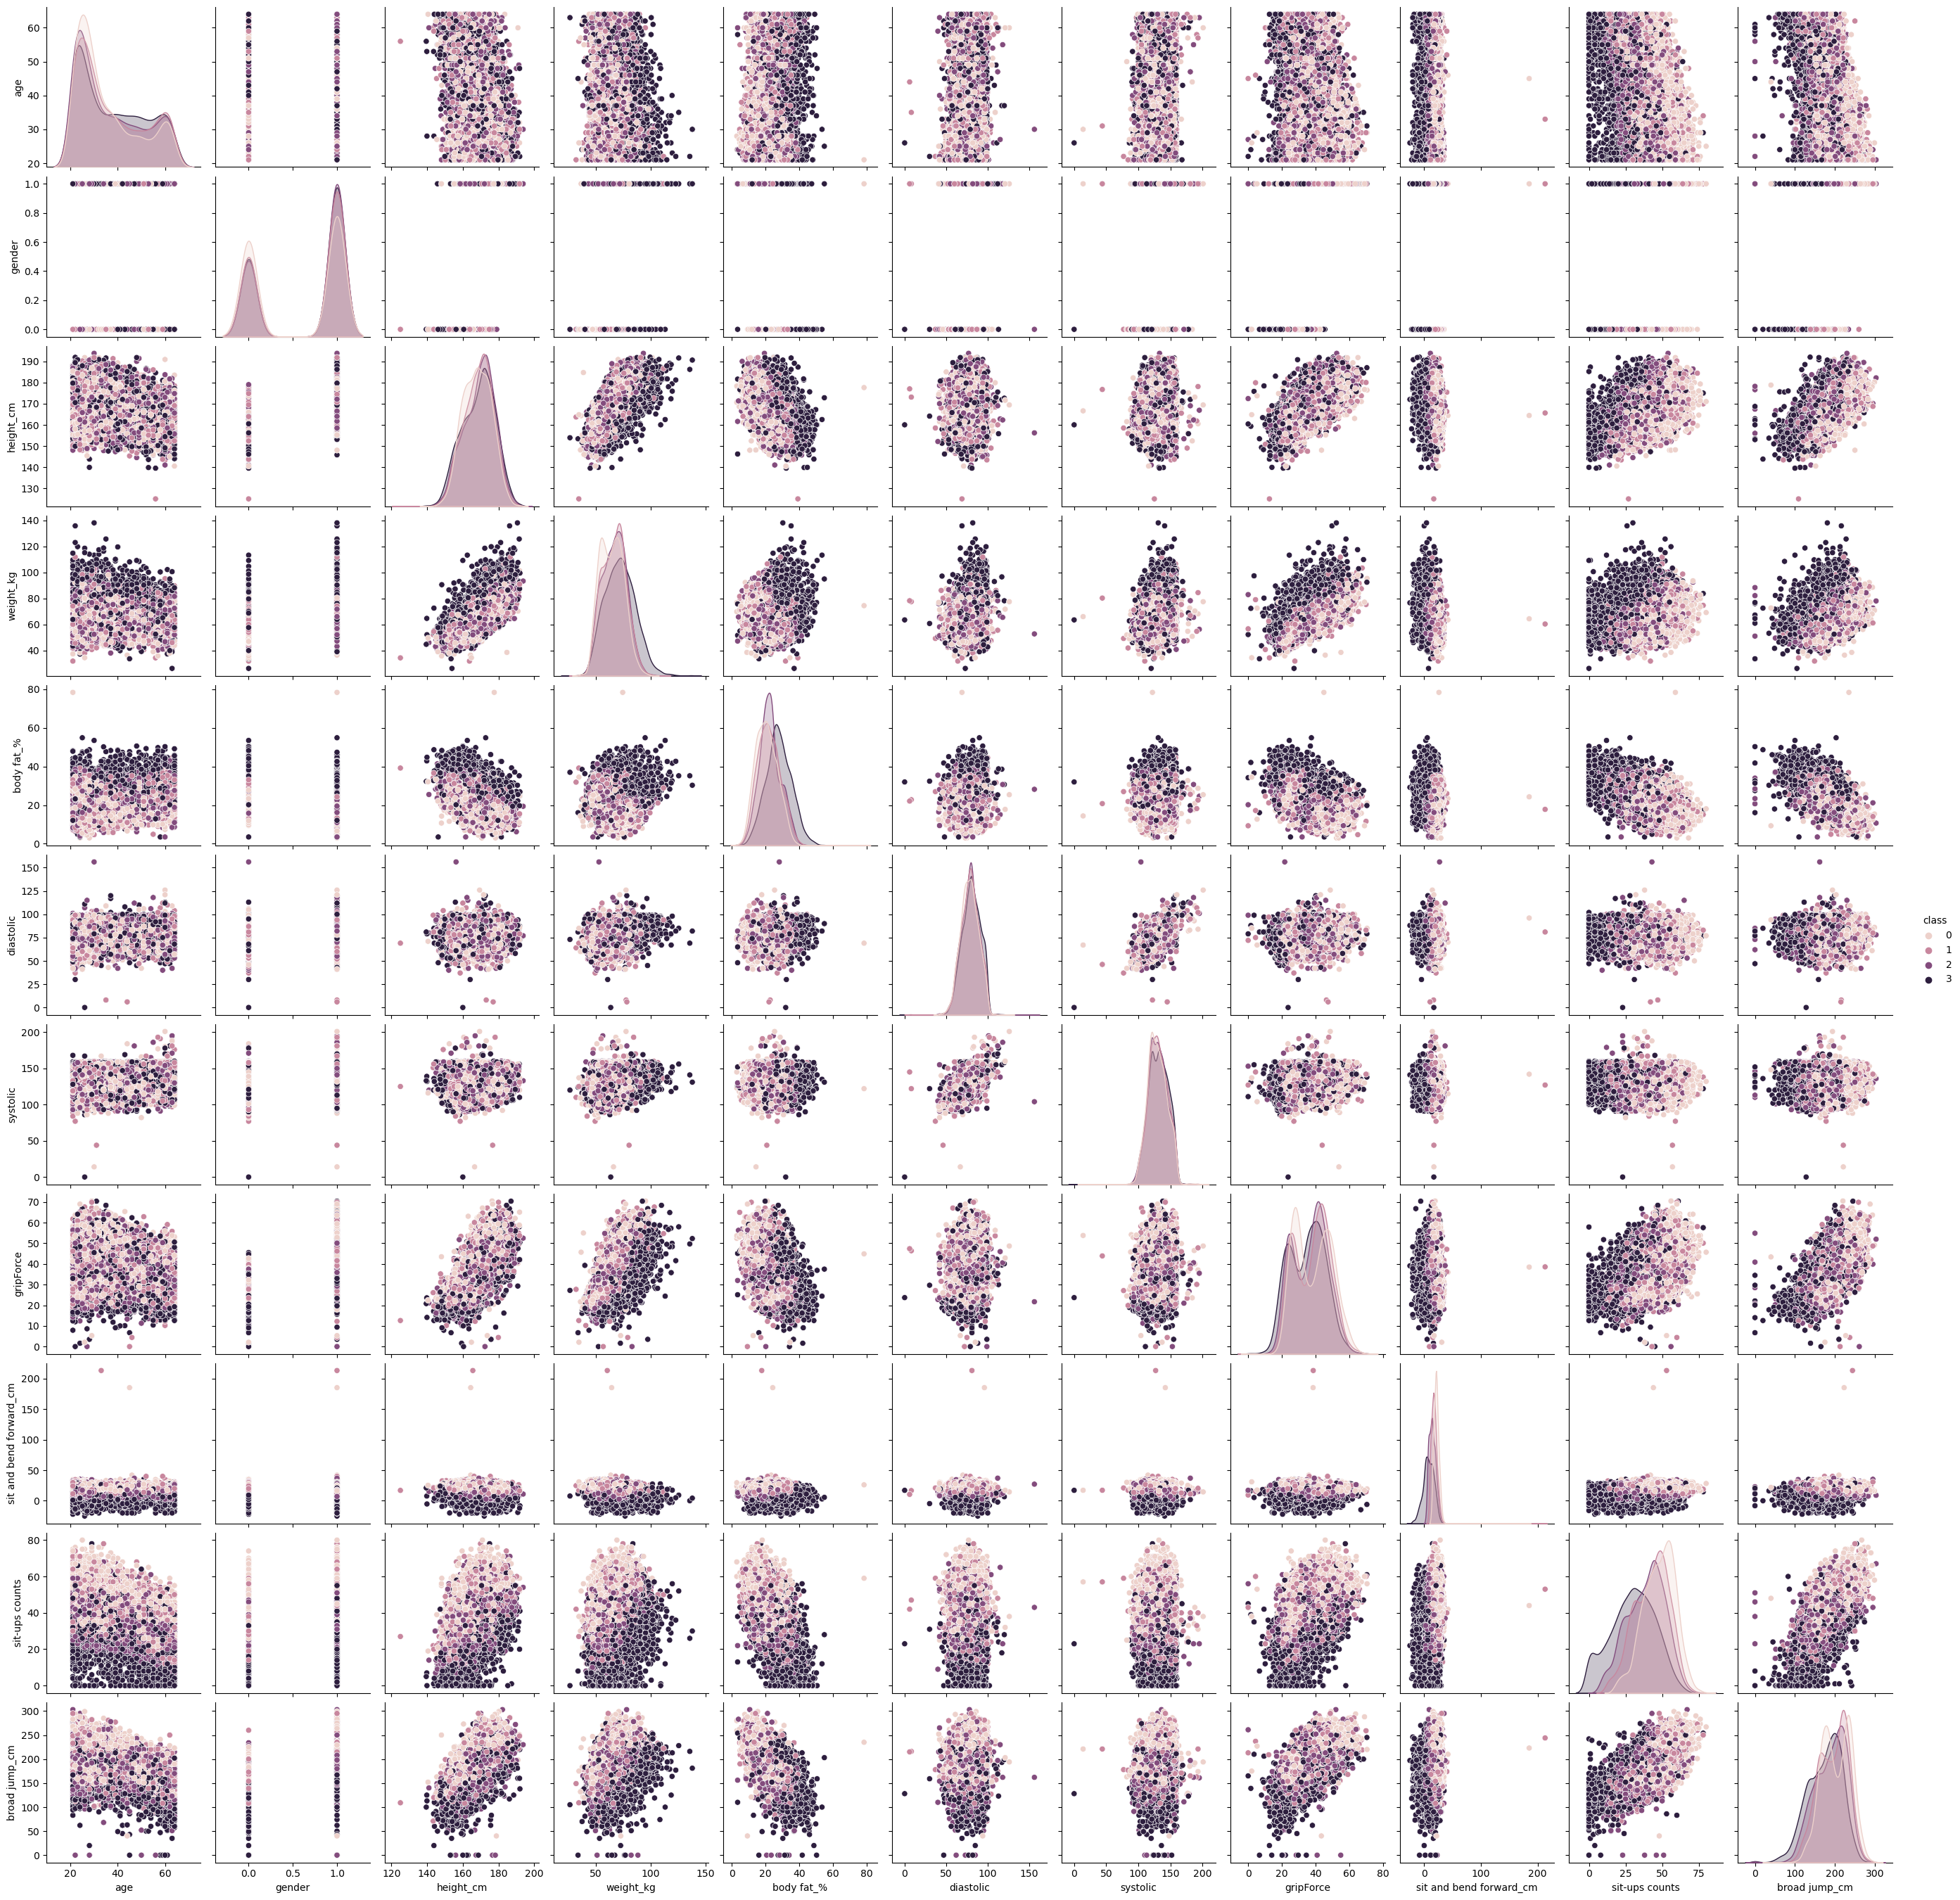

In [34]:
sns.pairplot(data,hue="class")

In [12]:
cols=['gender','class']
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13392 non-null  float64
 1   gender                   13392 non-null  int32  
 2   height_cm                13392 non-null  float64
 3   weight_kg                13392 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13392 non-null  float64
 6   systolic                 13392 non-null  float64
 7   gripForce                13392 non-null  float64
 8   sit and bend forward_cm  13392 non-null  float64
 9   sit-ups counts           13392 non-null  float64
 10  broad jump_cm            13392 non-null  float64
 11  class                    13392 non-null  int32  
dtypes: float64(10), int32(2)
memory usage: 1.2 MB


In [14]:
x=data.iloc[:,:-1].values

In [15]:
y=data.iloc[:,-1].values

In [16]:
data['class'].unique()

array([2, 0, 1, 3])

In [17]:
sc=StandardScaler()

In [18]:
x=sc.fit_transform(x)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
model=RandomForestClassifier()

In [21]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.7297499066815976
confusion_matrix train is::  [[2673    0    0    0]
 [   0 2668    0    0]
 [   0    0 2692    0]
 [   0    0    0 2680]]
confusion_matrix test is::  [[566  97   8   3]
 [152 408  91  28]
 [ 59 110 446  42]
 [  8  41  85 535]]
Wrong Predictions made: 724 / 2679
************************************************************


In [22]:
OUTPUT=pd.DataFrame(zip(y,model.predict(x)),columns=("ACTUAL","PREDICTION"),dtype=int)

In [23]:
OUTPUT.sample(15)

ACTUAL  PREDICTION
1434        0           0
1150        2           2
659         2           2
155         1           1
1370        2           2
12466       1           1
4367        0           0
1294        2           2
2289        1           1
4535        3           3
6474        3           3
12693       1           0
9884        2           1
2434        2           2
5322        0           0

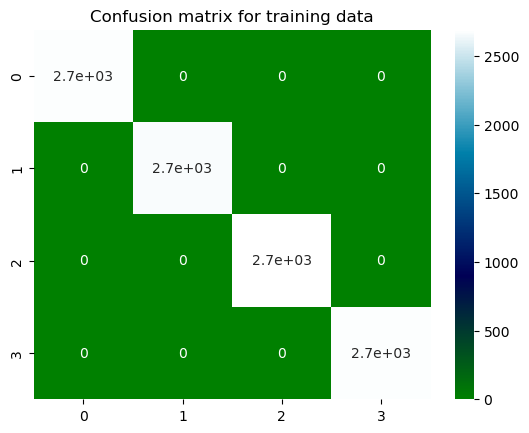

In [24]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train,annot=True,cmap='ocean');

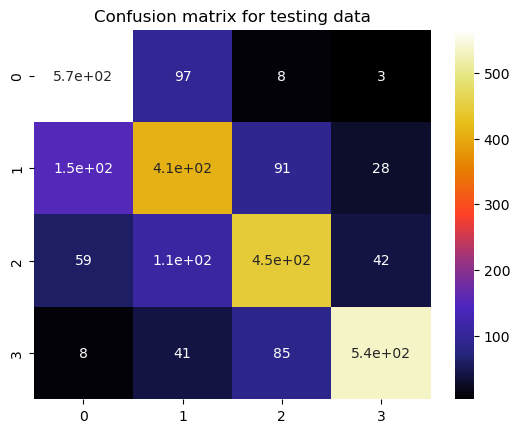

In [25]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

## WE HAVE BINIRIZE THE TARGET

In [26]:
y = label_binarize(y, classes=[0,1,2,3])
n_classes =4

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# <CENTER> ALTERNATIVE METHOD

## USING RANDOM FOREST CLASSIFIER

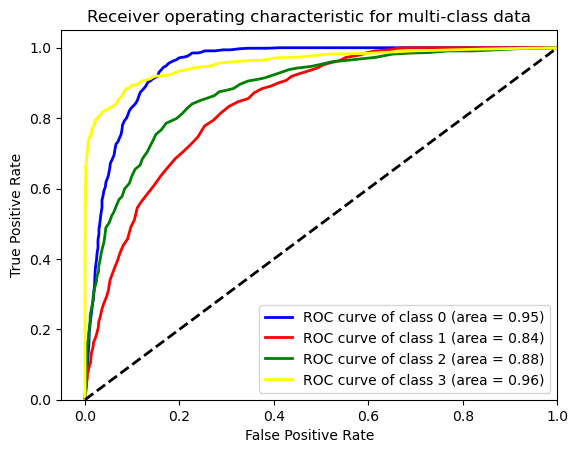

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y.shape[1]


classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()